In [12]:
import csv
import datetime
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

dataframefinal = pd.read_csv('nuevascategorias_enfermedades/dataframefinal.csv', sep = ',')
print(dataframefinal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    262 non-null    int64  
 1   Unnamed: 0.2                  262 non-null    int64  
 2   IRA_Alta                      262 non-null    float64
 3   Influenza                     262 non-null    float64
 4   Neumonia                      262 non-null    float64
 5   Bronquitis_bronquiolitis      262 non-null    float64
 6   Crisis_obstructiva_bronquial  262 non-null    float64
 7   Otra_causa_respiratoria       262 non-null    float64
 8   CAUSAS_SISTEMA_RESPIRATORIO   262 non-null    float64
 9   COVID19_Confirmado_u          262 non-null    float64
 10  COVID19_Confirmado_h          262 non-null    float64
 11  Humedad                       262 non-null    float64
 12  Rocio                         262 non-null    float64
 13  Tempe

In [13]:
del dataframefinal["Unnamed: 0"]
del dataframefinal["Unnamed: 0.2"]
dataframefinal.drop((dataframefinal.tail(1).index), inplace = True)
display(dataframefinal.info())
print('----------------------')
print('Media de cada variable')
print('----------------------')
print(dataframefinal.mean(axis=0))

print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
print(dataframefinal.var(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   IRA_Alta                      261 non-null    float64
 1   Influenza                     261 non-null    float64
 2   Neumonia                      261 non-null    float64
 3   Bronquitis_bronquiolitis      261 non-null    float64
 4   Crisis_obstructiva_bronquial  261 non-null    float64
 5   Otra_causa_respiratoria       261 non-null    float64
 6   CAUSAS_SISTEMA_RESPIRATORIO   261 non-null    float64
 7   COVID19_Confirmado_u          261 non-null    float64
 8   COVID19_Confirmado_h          261 non-null    float64
 9   Humedad                       261 non-null    float64
 10  Rocio                         261 non-null    float64
 11  Temperatura                   261 non-null    float64
 12  Temperatura_min               261 non-null    float64
 13  Tempe

None

----------------------
Media de cada variable
----------------------
IRA_Alta                        95.268199
Influenza                        7.747126
Neumonia                         8.812261
Bronquitis_bronquiolitis        37.486590
Crisis_obstructiva_bronquial    20.724138
Otra_causa_respiratoria         12.134100
CAUSAS_SISTEMA_RESPIRATORIO      9.965517
COVID19_Confirmado_u             4.996169
COVID19_Confirmado_h             2.735632
Humedad                         66.502299
Rocio                            9.253640
Temperatura                     16.304981
Temperatura_min                 11.306513
Temperatura_max                 24.459770
MP10                            39.676628
MP2.5                           12.868199
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        3009.889331
Influenza                        189.735809
Neumonia                          41.253080
Bronquitis_bronquiolitis        14

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


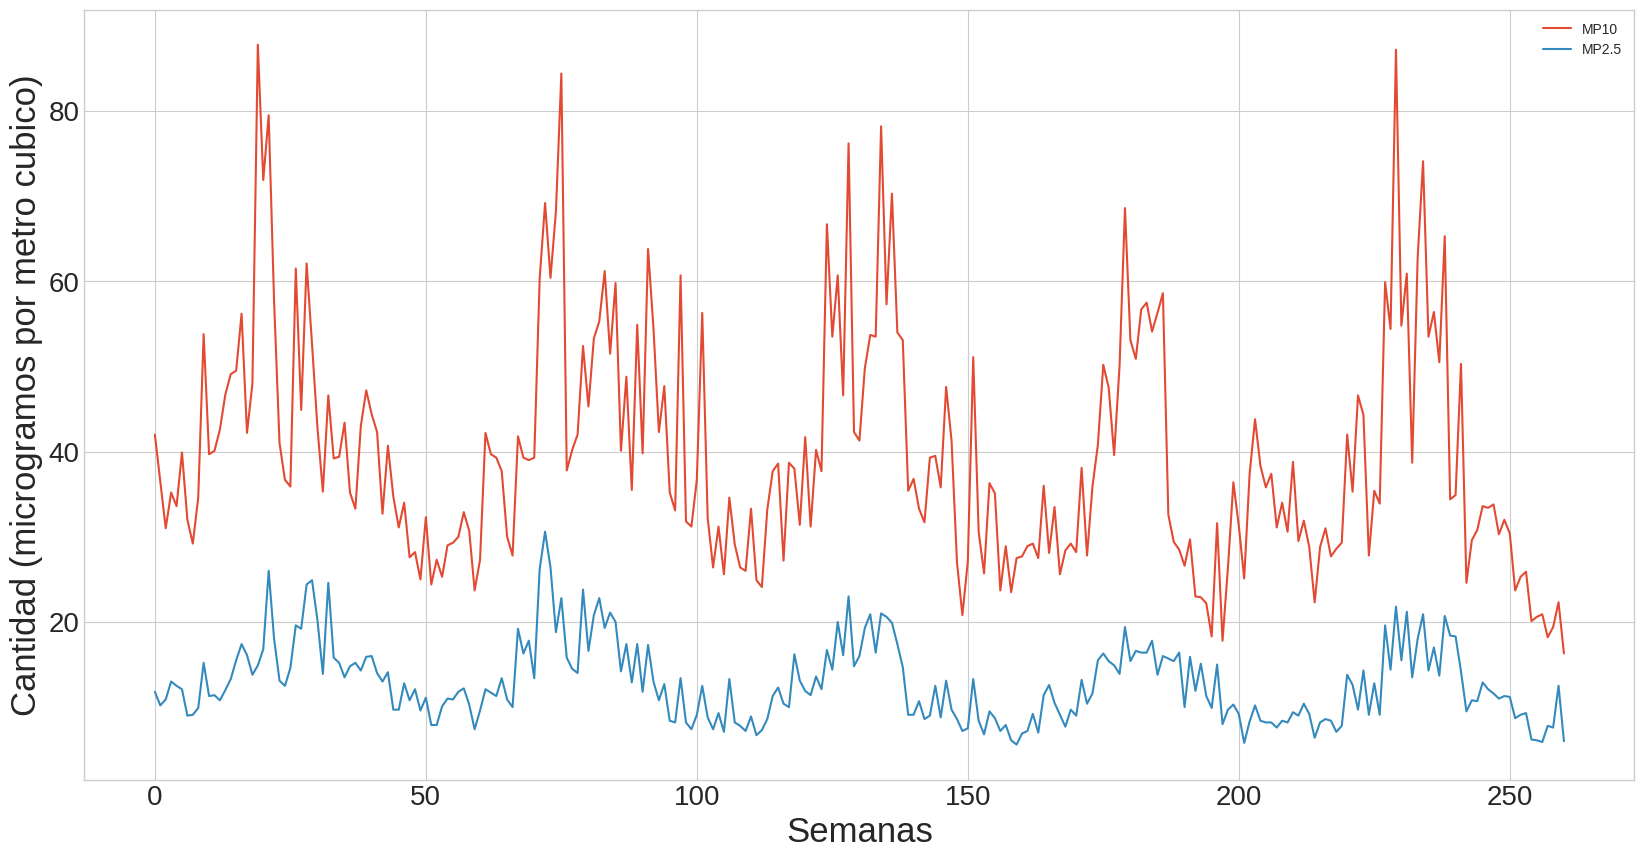

In [14]:
print(plt.style.available)
plt.style.use('seaborn-whitegrid')
# plot multiple columns such as population and year from dataframe
dataframefinal.plot(x=None, y=["MP10", "MP2.5"], fontsize=20,
        kind="line",figsize=(20, 10)
                   )
#plt.axes().set_facecolor("white")
plt.xlabel("Semanas", fontsize=25)
plt.ylabel("Cantidad (microgramos por metro cubico)", fontsize=25)

# display plot
plt.show()

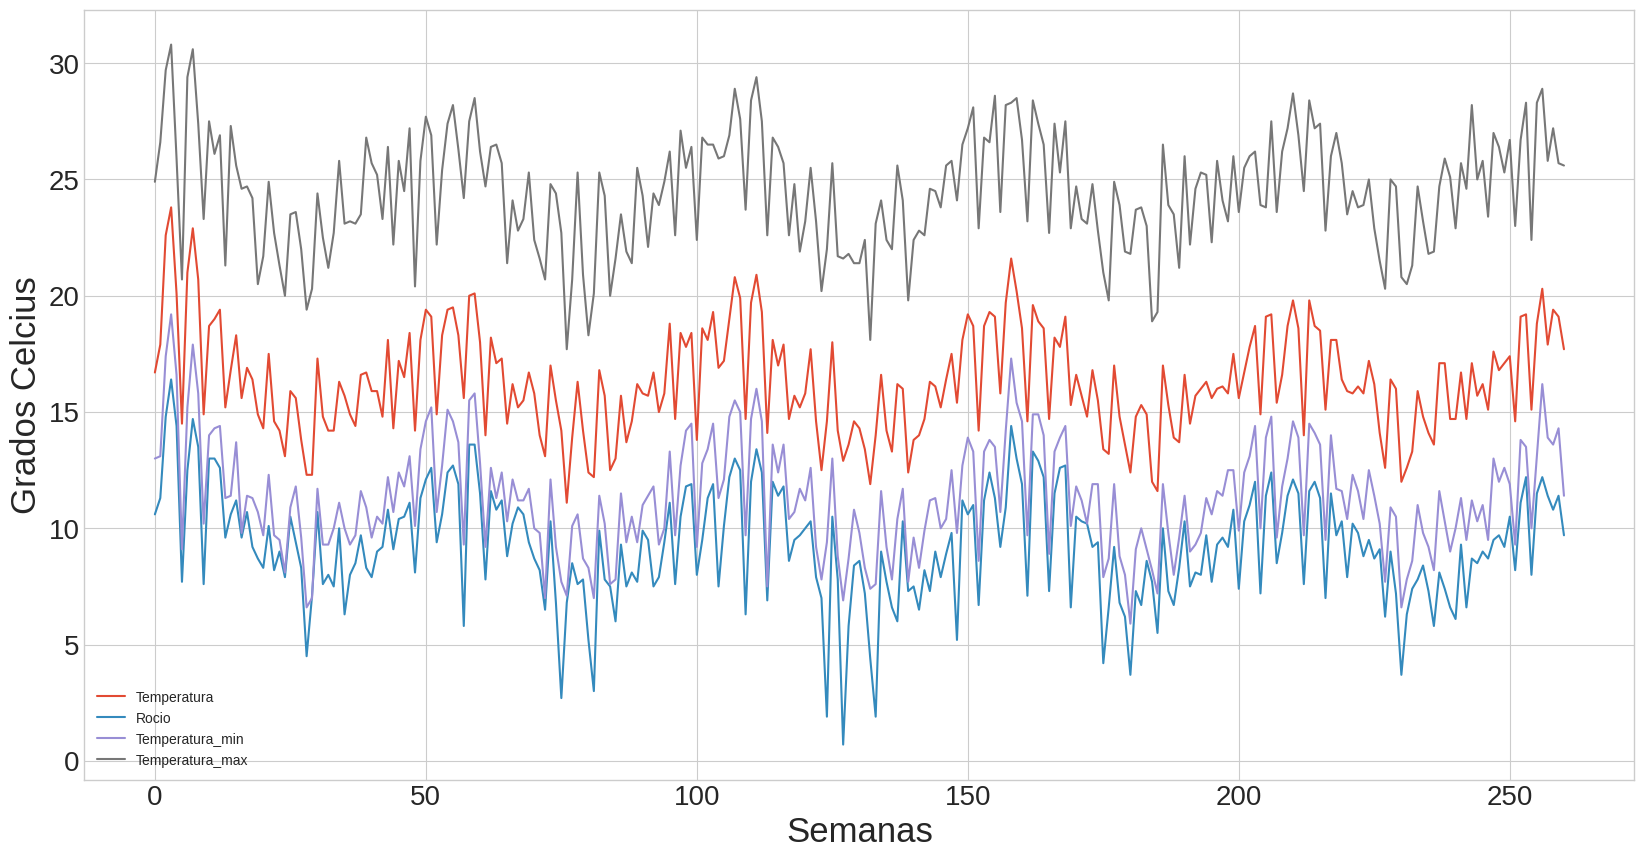

In [15]:
plt.style.use('seaborn-whitegrid')
# plot multiple columns such as population and year from dataframe
dataframefinal.plot(x=None, y=["Temperatura", "Rocio", "Temperatura_min", "Temperatura_max"], fontsize=20,
        kind="line",figsize=(20, 10)
                   )
#plt.axes().set_facecolor("white")
plt.xlabel("Semanas", fontsize=25)
plt.ylabel("Grados Celcius", fontsize=25)

# display plot
plt.show()

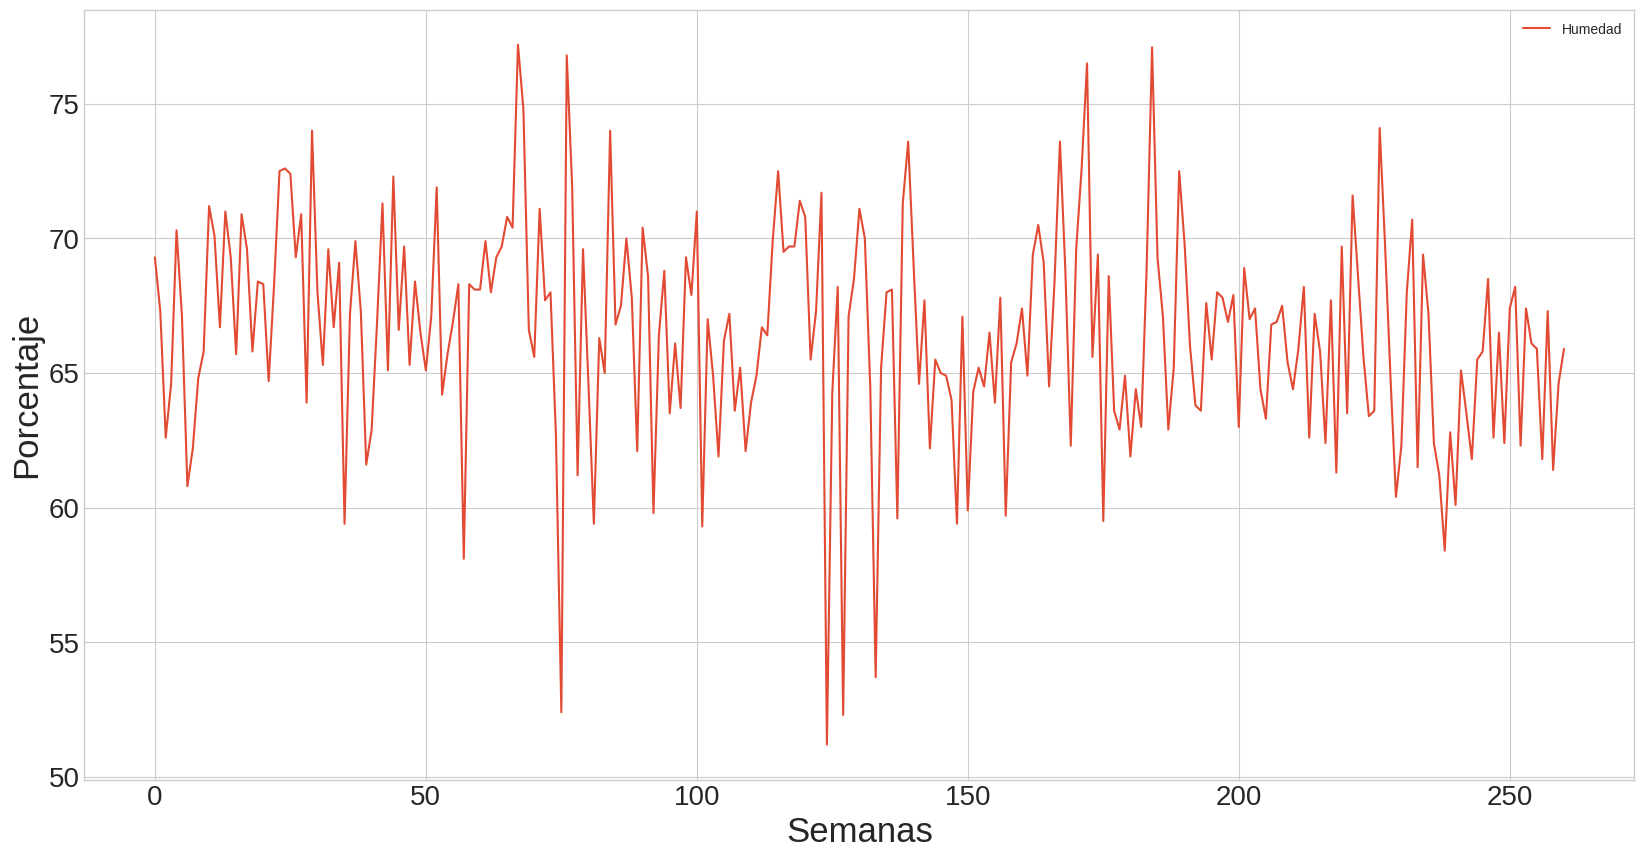

In [16]:
plt.style.use('seaborn-whitegrid')
# plot multiple columns such as population and year from dataframe
dataframefinal.plot(x=None, y=["Humedad"], fontsize=20,
        kind="line",figsize=(20, 10)
                   )
#plt.axes().set_facecolor("white")
plt.xlabel("Semanas", fontsize=25)
plt.ylabel("Porcentaje", fontsize=25)  #revisar porcentaje

# display plot
plt.show()

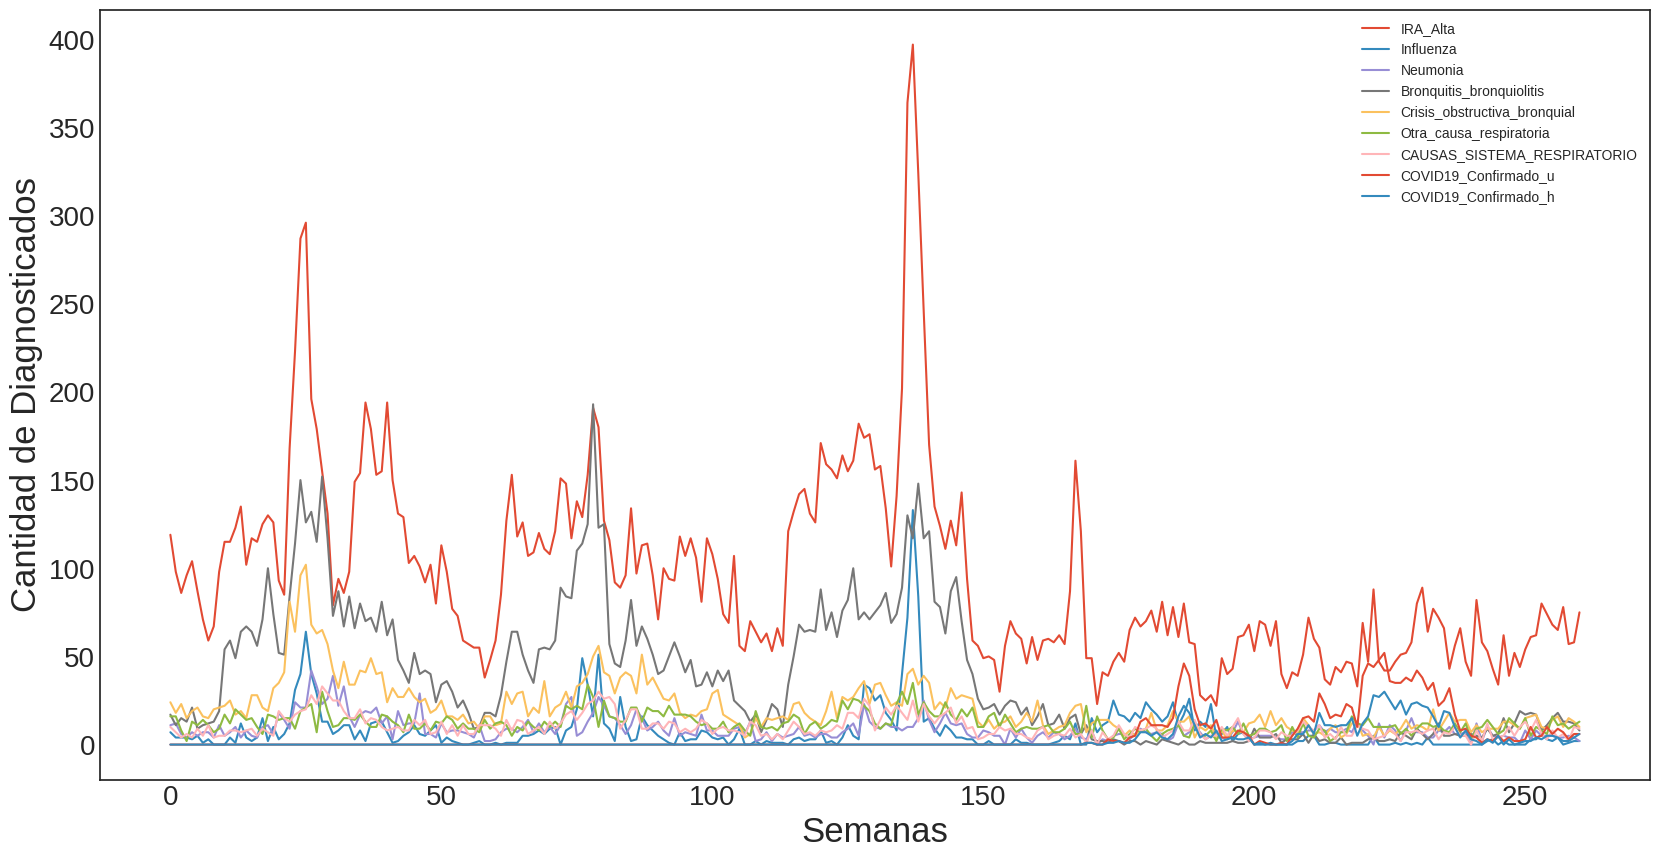

In [17]:
plt.style.use('seaborn-white')
# plot multiple columns such as population and year from dataframe
dataframefinal.plot(x=None, y=["IRA_Alta", "Influenza","Neumonia", "Bronquitis_bronquiolitis", "Crisis_obstructiva_bronquial",
                               "Otra_causa_respiratoria", "CAUSAS_SISTEMA_RESPIRATORIO", "COVID19_Confirmado_u",
                               "COVID19_Confirmado_h"], fontsize=20, kind="line",figsize=(20, 10))
#plt.axes().set_facecolor("white")
plt.xlabel("Semanas", fontsize=25)
plt.ylabel("Cantidad de Diagnosticados", fontsize=25)  #revisar porcentaje

# display plot
plt.show()

In [19]:
dataframefinal.describe() 
#Count = cantidad de datos
#Mean = promedio 
#std = desviación estandar
#min = mínimo
#max = máximo

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,95.268199,7.747126,8.812261,37.486590,20.724138,12.134100,9.965517,4.996169,2.735632,66.502299,9.253640,16.304981,11.306513,24.459770,39.676628,12.868199
std,54.862458,13.774462,6.422856,37.580949,14.570800,5.733272,5.977744,10.757287,5.977766,3.993263,2.436098,2.274037,2.388320,2.488626,13.682730,4.617611
min,22.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,51.200000,0.700000,11.100000,5.900000,17.700000,16.300000,5.600000
25%,57.000000,1.000000,5.000000,6.000000,11.000000,9.000000,6.000000,0.000000,0.000000,64.300000,7.600000,14.700000,9.600000,22.700000,29.400000,9.100000
50%,80.000000,3.000000,7.000000,22.000000,16.000000,11.000000,8.000000,0.000000,0.000000,66.800000,9.200000,16.000000,11.200000,24.600000,36.400000,12.100000
75%,121.000000,10.000000,11.000000,64.000000,27.000000,15.000000,13.000000,4.000000,2.000000,69.100000,11.100000,18.100000,13.000000,26.400000,47.600000,15.500000
max,397.000000,133.000000,42.000000,193.000000,102.000000,35.000000,33.000000,52.000000,30.000000,77.200000,16.400000,23.800000,19.200000,30.800000,87.800000,30.600000


In [28]:
#normalizacion del Chichi
Data_norm = (dataframefinal-dataframefinal.min())/(dataframefinal.max()-dataframefinal.min())
Data_norm #Datos normalizados entre [0,1]

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,0.258667,0.052632,0.261905,0.088083,0.212121,0.424242,0.303030,0.000000,0.000000,0.696154,0.630573,0.440945,0.533835,0.549618,0.359441,0.248
1,0.202667,0.030075,0.285714,0.056995,0.151515,0.424242,0.212121,0.000000,0.000000,0.619231,0.675159,0.535433,0.541353,0.679389,0.282517,0.184
2,0.170667,0.030075,0.142857,0.077720,0.202020,0.181818,0.121212,0.000000,0.000000,0.438462,0.898089,0.905512,0.864662,0.916031,0.205594,0.212
3,0.197333,0.030075,0.095238,0.067358,0.121212,0.000000,0.181818,0.000000,0.000000,0.515385,1.000000,1.000000,1.000000,1.000000,0.264336,0.296
4,0.218667,0.022556,0.166667,0.108808,0.161616,0.333333,0.121212,0.000000,0.000000,0.734615,0.872611,0.708661,0.804511,0.625954,0.241958,0.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.114667,0.030075,0.095238,0.093264,0.131313,0.272727,0.121212,0.173077,0.133333,0.407692,0.732484,0.724409,0.774436,0.854962,0.064336,0.012
257,0.149333,0.000000,0.095238,0.067358,0.070707,0.303030,0.181818,0.134615,0.066667,0.619231,0.681529,0.535433,0.601504,0.618321,0.026573,0.088
258,0.093333,0.007519,0.119048,0.067358,0.121212,0.212121,0.060606,0.057692,0.066667,0.392308,0.643312,0.653543,0.578947,0.725191,0.043357,0.080
259,0.096000,0.015038,0.095238,0.062176,0.101010,0.272727,0.303030,0.115385,0.133333,0.515385,0.681529,0.629921,0.631579,0.610687,0.083916,0.276


In [10]:
Data_norm.describe() #Descripción de datos normalizados para verificar rango [0,1]

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.196372,0.058781,0.211240,0.195827,0.179978,0.307494,0.303030,0.096079,0.090698,0.590072,0.542907,0.406427,0.403159,0.513107,0.315903,0.292667
std,0.146841,0.104051,0.153204,0.195281,0.147755,0.174625,0.181563,0.208054,0.200280,0.153541,0.155092,0.177689,0.178007,0.188931,0.194015,0.184507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093333,0.001880,0.119048,0.031088,0.080808,0.212121,0.181818,0.000000,0.000000,0.507692,0.439490,0.277559,0.278195,0.381679,0.168929,0.141000
50%,0.156000,0.022556,0.166667,0.116580,0.131313,0.272727,0.242424,0.000000,0.000000,0.601923,0.541401,0.385827,0.398496,0.522901,0.268571,0.260000
75%,0.268000,0.075188,0.261905,0.331606,0.242424,0.416667,0.393939,0.076923,0.066667,0.694231,0.654459,0.543307,0.530075,0.654580,0.426786,0.402000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#normalizar usando standartscaler para comparar 
normaliza2 = StandardScaler().fit_transform(dataframefinal)

frame = pd.DataFrame(data = normaliza2,
                    index = None,
                    columns = dataframefinal.columns.values)
frame

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,0.433400,-0.054344,0.341272,-0.546180,0.225256,0.675588,0.005780,-0.465337,-0.458514,0.701951,0.553733,0.174042,0.710432,0.177237,0.170129,-0.231776
1,0.049889,-0.272557,0.497265,-0.706142,-0.187318,0.675588,-0.497046,-0.465337,-0.458514,0.200146,0.841629,0.702752,0.752383,0.861657,-0.232609,-0.578941
2,-0.169260,-0.272557,-0.438693,-0.599500,0.156493,-0.722457,-0.999872,-0.465337,-0.458514,-0.979098,2.281114,2.773532,2.556271,2.109717,-0.635348,-0.427056
3,0.013364,-0.272557,-0.750679,-0.652821,-0.393605,-1.770990,-0.664655,-0.465337,-0.458514,-0.477292,2.939163,3.302241,3.311387,2.552577,-0.327802,0.028598
4,0.159464,-0.345295,-0.282700,-0.439538,-0.118556,0.151321,-0.999872,-0.465337,-0.458514,0.952854,2.116601,1.672053,2.220664,0.579837,-0.444963,-0.079891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,-0.552771,-0.272557,-0.750679,-0.519519,-0.324842,-0.198190,-0.999872,0.372912,0.211918,-1.179820,1.211782,1.760171,2.052861,1.787637,-1.374923,-1.511948
257,-0.315359,-0.563507,-0.750679,-0.652821,-0.737416,-0.023435,-0.664655,0.186635,-0.123298,0.200146,0.882758,0.702752,1.087990,0.539577,-1.572631,-1.099689
258,-0.698870,-0.490770,-0.594686,-0.652821,-0.393605,-0.547701,-1.335089,-0.185921,-0.123298,-1.280182,0.635989,1.363639,0.962138,1.103217,-1.484761,-1.143085
259,-0.680607,-0.418032,-0.750679,-0.679481,-0.531129,-0.198190,0.005780,0.093496,0.211918,-0.477292,0.882758,1.231462,1.255794,0.499317,-1.272408,-0.079891


In [21]:
frame.describe()

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
mean,5.444772e-17,3.062684e-17,5.444772e-17,-5.444772e-17,-1.088954e-16,-1.088954e-16,1.361193e-16,-1.088954e-16,-5.444772e-17,2.205133e-15,4.355818e-16,1.463282e-15,-3.539102e-16,-1.599402e-16,-7.894919e-16,1.769551e-16
std,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00
min,-1.338055e+00,-5.635073e-01,-1.374652e+00,-9.994056e-01,-1.218752e+00,-1.770990e+00,-1.670306e+00,-4.653374e-01,-4.585138e-01,-3.839391e+00,-3.517951e+00,-2.293270e+00,-2.268080e+00,-2.721484e+00,-1.711759e+00,-1.577041e+00
25%,-6.988699e-01,-4.907697e-01,-5.946863e-01,-8.394435e-01,-6.686537e-01,-5.477014e-01,-6.646548e-01,-4.653374e-01,-4.585138e-01,-5.525632e-01,-6.801109e-01,-7.071408e-01,-7.158974e-01,-7.084837e-01,-7.525086e-01,-8.176173e-01
50%,-2.788343e-01,-3.452946e-01,-2.827001e-01,-4.128779e-01,-3.248424e-01,-1.981902e-01,-3.294376e-01,-4.653374e-01,-4.585138e-01,7.469408e-02,-2.206106e-02,-1.343719e-01,-4.468331e-02,5.645657e-02,-2.399319e-01,-1.666825e-01
75%,4.699249e-01,1.638686e-01,3.412723e-01,7.068568e-01,4.315425e-01,5.008320e-01,5.086054e-01,-9.278199e-02,-1.232978e-01,6.517707e-01,7.593732e-01,7.908701e-01,7.104325e-01,7.811368e-01,5.801908e-01,5.710436e-01
max,5.510353e+00,9.110593e+00,5.177058e+00,4.146042e+00,5.588712e+00,3.995943e+00,3.860777e+00,4.377882e+00,4.569725e+00,2.684084e+00,2.939163e+00,3.302241e+00,3.311387e+00,2.552577e+00,3.523846e+00,3.847415e+00


In [22]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(dataframefinal)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
#modelo_pca.components_
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = dataframefinal.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16']
)

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
PC1,0.295469,0.240739,0.250718,0.323418,0.297383,0.240575,0.298543,-0.076639,-0.076745,0.046143,-0.254233,-0.284397,-0.278522,-0.282302,0.242171,0.276620
PC2,-0.214072,-0.088417,-0.133255,-0.235913,-0.224994,-0.171466,-0.151211,0.408266,0.407914,-0.077066,-0.336117,-0.316190,-0.328443,-0.271274,0.133490,0.137138
PC3,0.058144,0.067131,0.225446,0.029611,0.078059,0.125589,0.198540,0.396447,0.399727,-0.368385,0.116369,0.308376,0.241444,0.321406,0.323380,0.227284
PC4,-0.104585,-0.174499,-0.217776,-0.013349,-0.122965,0.200582,-0.026656,-0.309794,-0.300837,-0.718562,-0.333600,0.039752,-0.089456,0.093916,0.147838,0.024271
PC5,0.262748,0.428094,-0.190953,0.087452,-0.017058,0.301040,0.008752,0.215515,0.215706,-0.214808,-0.151374,-0.033656,-0.046721,0.011759,-0.442796,-0.501040
PC6,0.298352,0.447682,-0.533685,-0.015714,-0.097136,-0.019267,-0.400995,-0.043965,-0.056301,0.121335,0.102173,0.063880,0.072734,0.051602,0.393024,0.241104
PC7,0.023108,0.479270,0.264172,-0.142315,0.084618,-0.722972,0.028222,-0.103579,-0.111602,-0.279037,-0.114791,0.031643,-0.057720,0.077421,-0.146450,0.055531
PC8,-0.357350,0.433728,0.064699,-0.306269,-0.507202,0.291729,0.418046,-0.086358,-0.118036,0.144934,0.044353,-0.003324,0.053780,-0.018028,-0.011229,0.146130
PC9,-0.405272,0.094383,-0.481365,-0.118612,0.641292,0.025838,0.226650,0.048399,0.025375,-0.026336,0.040696,0.041401,0.049942,-0.070916,-0.214176,0.239431
PC10,-0.247687,0.200341,0.401651,-0.390363,0.355325,0.335632,-0.522700,-0.046255,-0.048226,0.014289,-0.037006,-0.031670,-0.019917,0.009863,0.175152,-0.185672


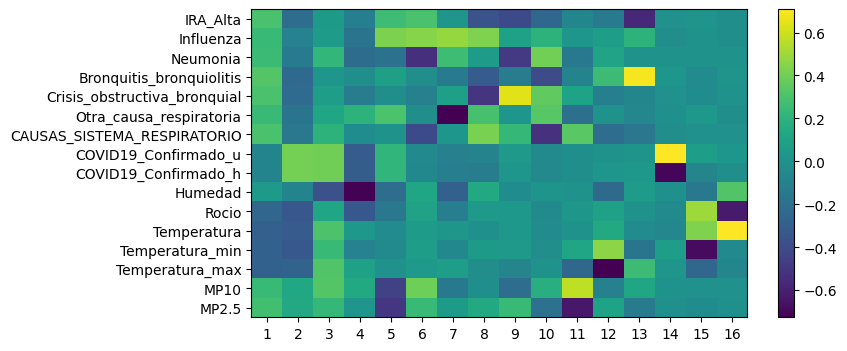

In [23]:
# Heatmap componentes
# ==============================================================================
matplotlib.rcParams.update(matplotlib.rcParamsDefault) # reset estilo a los valores por defecto

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
plt.xticks(range(len(dataframefinal.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();
plt.show()

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[4.01300430e-01 2.08222381e-01 8.60958126e-02 8.02890873e-02
 5.62390043e-02 5.22970205e-02 3.74097755e-02 2.37705881e-02
 1.45962063e-02 1.26897952e-02 1.03981869e-02 7.70414993e-03
 5.66692667e-03 1.68083605e-03 1.38983912e-03 2.49961169e-04]


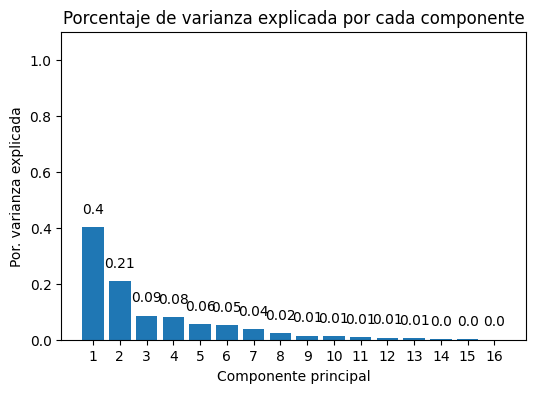

In [25]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');
plt.show()

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.40130043 0.60952281 0.69561862 0.77590771 0.83214671 0.88444374
 0.92185351 0.9456241  0.9602203  0.9729101  0.98330829 0.99101244
 0.99667936 0.9983602  0.99975004 1.        ]


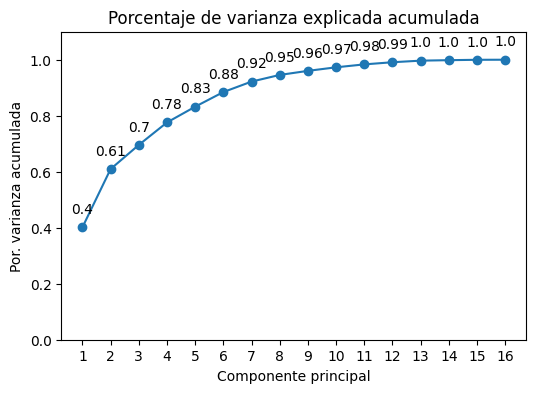

In [26]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(dataframefinal.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');
plt.show()

In [27]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=dataframefinal)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'],
    index   = dataframefinal.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.102717,-1.134748,-0.091517,-0.422703,-0.252699,0.165154,-0.536980,0.315422,-0.208970,0.623907,0.182566,-0.125800,-0.694748,0.002196,-0.233044,-0.068336
1,-1.199170,-1.373628,0.172295,-0.034103,-0.083241,-0.087306,-0.421579,0.297954,-0.505287,0.881773,-0.186645,-0.221055,-0.410242,-0.012879,0.027645,-0.074529
2,-3.767871,-3.000446,1.684592,0.231383,-0.385561,0.750525,0.625835,-0.522108,0.391388,0.176199,-0.260260,0.479875,-0.266796,-0.018555,0.178259,-0.033581
3,-4.554462,-3.424154,2.097659,-0.399189,-1.205749,1.381971,1.048332,-0.282049,0.254979,-0.771465,-0.057303,0.457922,-0.375272,-0.015506,-0.004249,0.024186
4,-2.357267,-2.357895,0.324206,-1.071544,-0.691972,0.942571,-0.700711,0.018884,0.034327,0.305013,-0.301083,0.881772,-0.587913,-0.010134,-0.018451,0.009356


In [42]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = dataframefinal.columns,
                    index   = dataframefinal.index
)
print('------------------')
print('Valores reconstruidos')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores originales')
print('---------------------')
display(dataframefinal.head())

------------------
Valores reconstruidos
------------------


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,119.0,7.0,11.0,17.0,24.0,16.0,10.0,-3.552714e-15,-2.220446e-15,69.3,10.6,16.7,13.0,24.9,42.0,11.8
1,98.0,4.0,12.0,11.0,18.0,16.0,7.0,4.440892e-15,8.881784e-16,67.3,11.3,17.9,13.1,26.6,36.5,10.2
2,86.0,4.0,6.0,15.0,23.0,8.0,4.0,1.776357e-15,-1.776357e-15,62.6,14.8,22.6,17.4,29.7,31.0,10.9
3,96.0,4.0,4.0,13.0,15.0,2.0,6.0,-1.065814e-14,-6.661338e-15,64.6,16.4,23.8,19.2,30.8,35.2,13.0
4,104.0,3.0,7.0,21.0,19.0,13.0,4.0,-5.329071e-15,-4.440892e-15,70.3,14.4,20.1,16.6,25.9,33.6,12.5


---------------------
Valores originales
---------------------


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,119.0,7.0,11.0,17.0,24.0,16.0,10.0,0.0,0.0,69.3,10.6,16.7,13.0,24.9,42.0,11.8
1,98.0,4.0,12.0,11.0,18.0,16.0,7.0,0.0,0.0,67.3,11.3,17.9,13.1,26.6,36.5,10.2
2,86.0,4.0,6.0,15.0,23.0,8.0,4.0,0.0,0.0,62.6,14.8,22.6,17.4,29.7,31.0,10.9
3,96.0,4.0,4.0,13.0,15.0,2.0,6.0,0.0,0.0,64.6,16.4,23.8,19.2,30.8,35.2,13.0
4,104.0,3.0,7.0,21.0,19.0,13.0,4.0,0.0,0.0,70.3,14.4,20.1,16.6,25.9,33.6,12.5


In [28]:
#Cambiando el numero de componentes a 4 o 6
pca_pipe2 = make_pipeline(StandardScaler(), PCA(n_components=4))
pca_pipe2.fit(dataframefinal)
# Se extrae el modelo entrenado del pipeline
modelo_pca2 = pca_pipe2.named_steps['pca']
#modelo_pca.components_
# Se combierte el array a dataframe para añadir nombres a los ejes.
pcadataframe = pd.DataFrame(
    data    = modelo_pca2.components_,
    columns = dataframefinal.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4'])
#modelo_pca2.components_.index()
pcadataframe

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
PC1,0.295469,0.240739,0.250718,0.323418,0.297383,0.240575,0.298543,-0.076639,-0.076745,0.046143,-0.254233,-0.284397,-0.278522,-0.282302,0.242171,0.276620
PC2,-0.214072,-0.088417,-0.133255,-0.235913,-0.224994,-0.171466,-0.151211,0.408266,0.407914,-0.077066,-0.336117,-0.316190,-0.328443,-0.271274,0.133490,0.137138
PC3,0.058144,0.067131,0.225446,0.029611,0.078059,0.125589,0.198540,0.396447,0.399727,-0.368385,0.116369,0.308376,0.241444,0.321406,0.323380,0.227284
PC4,-0.104585,-0.174499,-0.217776,-0.013349,-0.122965,0.200582,-0.026656,-0.309794,-0.300837,-0.718562,-0.333600,0.039752,-0.089456,0.093916,0.147838,0.024271


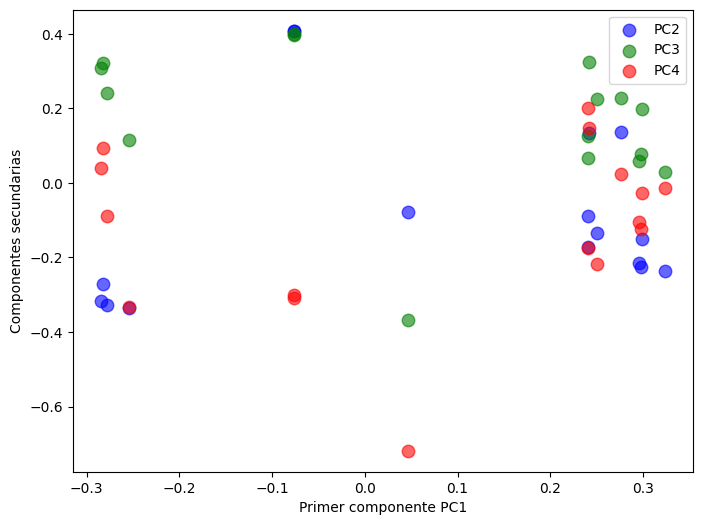

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[1,:], s=9**2, c=["Blue"], alpha=0.6)
plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[2,:], s=9**2, c=["green"], alpha=0.6)
plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[3,:], s=9**2, c=["red"], alpha=0.6)
plt.subplot().legend(['PC2','PC3','PC4'])
plt.xlabel('Primer componente PC1')
plt.ylabel('Componentes secundarias')
plt.show()

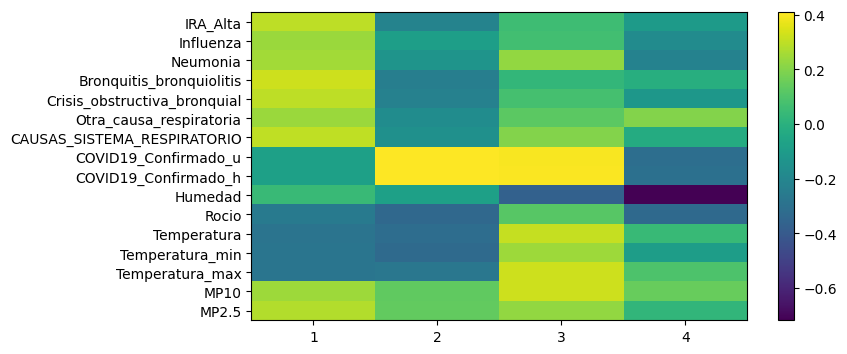

In [30]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes2 = modelo_pca2.components_
plt.imshow(componentes2.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
plt.xticks(range(4), np.arange(modelo_pca2.n_components_) + 1)
plt.grid(False)
plt.colorbar();
plt.show()

In [12]:
frameparacortar = dataframefinal.iloc[168:258]
frameparacortar.describe()

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,55.833333,5.200000,6.000000,4.666667,10.511111,8.511111,6.833333,14.322222,7.800000,65.992222,8.798889,15.978889,10.901111,24.374444,37.722222,12.201111
std,17.087514,7.262649,3.016807,4.683224,4.133297,3.730363,3.226471,14.244911,8.011509,3.511785,1.982366,1.896448,1.986725,2.172740,13.928661,4.009049
min,22.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,58.400000,3.700000,11.600000,5.900000,18.900000,17.800000,5.800000
25%,43.000000,0.000000,4.000000,1.000000,8.000000,6.000000,5.000000,3.250000,2.000000,63.325000,7.400000,14.800000,9.525000,23.000000,28.525000,9.025000
50%,54.500000,1.500000,6.000000,3.000000,10.000000,9.000000,6.500000,9.500000,4.500000,65.850000,8.900000,15.950000,11.000000,24.600000,33.700000,11.300000
75%,67.750000,7.750000,7.750000,6.000000,13.000000,11.000000,9.000000,21.750000,11.000000,68.000000,10.200000,17.100000,11.975000,25.975000,47.275000,15.400000
max,121.000000,26.000000,15.000000,19.000000,23.000000,22.000000,15.000000,52.000000,30.000000,77.100000,12.700000,19.800000,14.800000,28.700000,87.200000,21.800000


In [13]:
#A partir de aqui implemento apriori
from mlxtend.frequent_patterns import apriori, association_rules 
dataframefinal

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,119.0,7.0,11.0,17.0,24.0,16.0,10.0,0.0,0.0,69.3,10.6,16.7,13.0,24.9,42.0,11.8
1,98.0,4.0,12.0,11.0,18.0,16.0,7.0,0.0,0.0,67.3,11.3,17.9,13.1,26.6,36.5,10.2
2,86.0,4.0,6.0,15.0,23.0,8.0,4.0,0.0,0.0,62.6,14.8,22.6,17.4,29.7,31.0,10.9
3,96.0,4.0,4.0,13.0,15.0,2.0,6.0,0.0,0.0,64.6,16.4,23.8,19.2,30.8,35.2,13.0
4,104.0,3.0,7.0,21.0,19.0,13.0,4.0,0.0,0.0,70.3,14.4,20.1,16.6,25.9,33.6,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,80.0,6.0,5.0,8.0,10.0,8.0,6.0,5.0,3.0,64.8,11.6,19.1,13.7,27.5,25.9,9.3
254,74.0,3.0,5.0,11.0,9.0,6.0,3.0,10.0,5.0,67.4,12.2,19.2,13.5,28.3,20.1,6.2
255,68.0,2.0,5.0,15.0,14.0,16.0,8.0,6.0,5.0,66.8,10.1,17.1,11.8,25.4,20.6,6.1
256,65.0,4.0,4.0,18.0,16.0,11.0,4.0,9.0,4.0,66.1,8.0,15.1,10.0,22.4,20.9,5.9


In [11]:
dfcategorico = dataframefinal
"""
dfcategorico['IRA_Alta'] = pd.cut(x=dataframefinal['IRA_Alta'], bins=[21, 57, 80, 400],
                                 labels=['IRA_Alta_Bajo', 'IRA_Alta_Medio', ' IRA_Alta_Alto'])
dfcategorico['Influenza'] = pd.cut(x=dataframefinal['Influenza'], bins=[-1, 0.25, 3, 134],
                                 labels=['Influenza_Bajo', 'Influenza_Medio', 'Influenza_Alto'])
dfcategorico['Neumonia'] = pd.cut(x=dataframefinal['Neumonia'], bins=[-1, 5, 7, 43],
                                 labels=['Neumonia_Bajo', 'Neumonia_Medio', 'Neumonia_Alto'])
dfcategorico['Bronquitis_bronquiolitis'] = pd.cut(x=dataframefinal['Bronquitis_bronquiolitis'], bins=[-1, 6, 22.5, 194],
                                 labels=['Bronquitis_bronquiolitis_Bajo', 'Bronquitis_bronquiolitis_Medio', 'Bronquitis_bronquiolitis_Alto'])
dfcategorico['Crisis_obstructiva_bronquial'] = pd.cut(x=dataframefinal['Crisis_obstructiva_bronquial'], bins=[3, 11, 16, 103],
                                 labels=['Crisis_obstructiva_bronquial_Bajo', 'Crisis_obstructiva_bronquial_Medio', 'Crisis_obstructiva_bronquial_Alto'])
dfcategorico['Otra_causa_respiratoria'] = pd.cut(x=dataframefinal['Otra_causa_respiratoria'], bins=[2, 9, 11, 36],
                                 labels=['Otra_causa_respiratoria_Bajo', 'Otra_causa_respiratoria_Medio', 'Otra_causa_respiratoria_Alto'])
dfcategorico['CAUSAS_SISTEMA_RESPIRATORIO'] = pd.cut(x=dataframefinal['CAUSAS_SISTEMA_RESPIRATORIO'], bins=[-1, 6, 8, 33],
                                 labels=['CAUSAS_SISTEMA_RESPIRATORIO_Bajo', 'CAUSAS_SISTEMA_RESPIRATORIO_Medio', 'CAUSAS_SISTEMA_RESPIRATORIO_Alto'])
dfcategorico['COVID19_Confirmado_u'] = pd.cut(x=dataframefinal['COVID19_Confirmado_u'], bins=[-1, 3.25, 9.5, 53],
                                 labels=['COVID19_Confirmado_u_Bajo', 'COVID19_Confirmado_u_Medio', 'COVID19_Confirmado_u_Alto'])
dfcategorico['COVID19_Confirmado_h'] = pd.cut(x=dataframefinal['COVID19_Confirmado_h'], bins=[-1, 2, 4.5, 31],
                                 labels=['COVID19_Confirmado_h_Bajo', 'COVID19_Confirmado_h_Medio', 'COVID19_Confirmado_h_Alto'])
dfcategorico['Humedad'] = pd.cut(x=dataframefinal['Humedad'], bins=[51, 64.4, 66.85, 73],
                                 labels=['Humedad_Bajo', 'Humedad_Medio', 'Humedad_Alto'])
dfcategorico['Rocio'] = pd.cut(x=dataframefinal['Rocio'], bins=[-1, 7.6, 9.2, 17],
                                 labels=['Rocio_Bajo', 'Rocio_Medio', 'Rocio_Alto'])
dfcategorico['Temperatura'] = pd.cut(x=dataframefinal['Temperatura'], bins=[11, 14.62, 16, 24],
                                 labels=['Temperatura_Bajo', 'Temperatura_Medio', 'Temperatura_Alto'])
dfcategorico['Temperatura_min'] = pd.cut(x=dataframefinal['Temperatura_min'], bins=[5, 9.6, 11.2, 20],
                                 labels=['Temperatura_min_Bajo', 'Temperatura_min_Medio', 'Temperatura_min_Alto'])
dfcategorico['Temperatura_max'] = pd.cut(x=dataframefinal['Temperatura_max'], bins=[17, 22.7, 24.55, 31],
                                 labels=['Temperatura_max_Bajo', 'Temperatura_max_Medio', 'Temperatura_max_Alto'])
dfcategorico['MP10'] = pd.cut(x=dataframefinal['MP10'], bins=[17, 29.62, 36.6, 88],
                                 labels=['MP10_Bajo', 'MP10_Medio', 'MP10_Alto'])
dfcategorico['MP2.5'] = pd.cut(x=dataframefinal['MP2.5'], bins=[5, 9.12, 12.1, 31],
                                 labels=['MP2.5_Bajo', 'MP2.5_Medio', 'MP2.5_Alto'])
"""
dfcategorico



,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,IRA_Alta_Alto,Influenza_Alto,Neumonia_Alto,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Alto,Otra_causa_respiratoria_Alto,CAUSAS_SISTEMA_RESPIRATORIO_Alto,COVID19_Confirmado_u_Bajo,COVID19_Confirmado_h_Bajo,Humedad_Alto,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Alto,MP2.5_Medio
1,IRA_Alta_Alto,Influenza_Alto,Neumonia_Alto,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Alto,Otra_causa_respiratoria_Alto,CAUSAS_SISTEMA_RESPIRATORIO_Medio,COVID19_Confirmado_u_Bajo,COVID19_Confirmado_h_Bajo,Humedad_Alto,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Medio,MP2.5_Medio
2,IRA_Alta_Alto,Influenza_Alto,Neumonia_Medio,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Alto,Otra_causa_respiratoria_Bajo,CAUSAS_SISTEMA_RESPIRATORIO_Bajo,COVID19_Confirmado_u_Bajo,COVID19_Confirmado_h_Bajo,Humedad_Bajo,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Medio,MP2.5_Medio
3,IRA_Alta_Alto,Influenza_Alto,Neumonia_Bajo,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Medio,NaN,CAUSAS_SISTEMA_RESPIRATORIO_Bajo,COVID19_Confirmado_u_Bajo,COVID19_Confirmado_h_Bajo,Humedad_Medio,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Medio,MP2.5_Alto
4,IRA_Alta_Alto,Influenza_Medio,Neumonia_Medio,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Alto,Otra_causa_respiratoria_Alto,CAUSAS_SISTEMA_RESPIRATORIO_Bajo,COVID19_Confirmado_u_Bajo,COVID19_Confirmado_h_Bajo,Humedad_Alto,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Medio,MP2.5_Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,IRA_Alta_Medio,Influenza_Alto,Neumonia_Bajo,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Bajo,Otra_causa_respiratoria_Bajo,CAUSAS_SISTEMA_RESPIRATORIO_Bajo,COVID19_Confirmado_u_Medio,COVID19_Confirmado_h_Medio,Humedad_Medio,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Bajo,MP2.5_Medio
254,IRA_Alta_Medio,Influenza_Medio,Neumonia_Bajo,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Bajo,Otra_causa_respiratoria_Bajo,CAUSAS_SISTEMA_RESPIRATORIO_Bajo,COVID19_Confirmado_u_Alto,COVID19_Confirmado_h_Alto,Humedad_Alto,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Bajo,MP2.5_Bajo
255,IRA_Alta_Medio,Influenza_Medio,Neumonia_Bajo,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Medio,Otra_causa_respiratoria_Alto,CAUSAS_SISTEMA_RESPIRATORIO_Medio,COVID19_Confirmado_u_Medio,COVID19_Confirmado_h_Alto,Humedad_Medio,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Bajo,MP2.5_Bajo
256,IRA_Alta_Medio,Influenza_Alto,Neumonia_Bajo,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Medio,Otra_causa_respiratoria_Medio,CAUSAS_SISTEMA_RESPIRATORIO_Bajo,COVID19_Confirmado_u_Medio,COVID19_Confirmado_h_Medio,Humedad_Medio,Rocio_Medio,Temperatura_Medio,Temperatura_min_Medio,Temperatura_max_Bajo,MP10_Bajo,MP2.5_Bajo


In [14]:
dfapriori = pd.DataFrame(
    data=0,
    index=np.arange(dataframefinal.shape[0]),
    columns = ['IRA_Alta_Bajo', 'IRA_Alta_Medio', 'IRA_Alta_Alto', 'Influenza_Bajo', 'Influenza_Medio', 'Influenza_Alto','Neumonia_Bajo', 'Neumonia_Medio', 'Neumonia_Alto','Bronquitis_bronquiolitis_Bajo', 'Bronquitis_bronquiolitis_Medio', 'Bronquitis_bronquiolitis_Alto','Crisis_obstructiva_bronquial_Bajo', 'Crisis_obstructiva_bronquial_Medio', 'Crisis_obstructiva_bronquial_Alto','Otra_causa_respiratoria_Bajo', 'Otra_causa_respiratoria_Medio', 'Otra_causa_respiratoria_Alto','CAUSAS_SISTEMA_RESPIRATORIO_Bajo', 'CAUSAS_SISTEMA_RESPIRATORIO_Medio', 'CAUSAS_SISTEMA_RESPIRATORIO_Alto','COVID19_Confirmado_u_Bajo', 'COVID19_Confirmado_u_Medio', 'COVID19_Confirmado_u_Alto','COVID19_Confirmado_h_Bajo', 'COVID19_Confirmado_h_Medio', 'COVID19_Confirmado_h_Alto','Humedad_Bajo', 'Humedad_Medio', 'Humedad_Alto','Rocio_Bajo', 'Rocio_Medio', 'Rocio_Alto','Temperatura_Bajo', 'Temperatura_Medio', 'Temperatura_Alto','Temperatura_min_Bajo', 'Temperatura_min_Medio', 'Temperatura_min_Alto','Temperatura_max_Bajo', 'Temperatura_max_Medio', 'Temperatura_max_Alto','MP10_Bajo', 'MP10_Medio', 'MP10_Alto','MP2.5_Alerta', 'MP2.5_Preemergencia', 'MP2.5_Emergencia'])
#dfapriori
#dataframefinal.IRA_Alta[0]

for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.IRA_Alta[i] <= 57):
        dfapriori.IRA_Alta_Bajo[i] = 1
    elif(dataframefinal.IRA_Alta[i] > 57 and dataframefinal.IRA_Alta[i] <= 80):
        dfapriori.IRA_Alta_Medio[i] = 1
    else:
        dfapriori.IRA_Alta_Alto[i] = 1

for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Influenza[i] <= 0.25):
        dfapriori.Influenza_Bajo[i] = 1
    elif(dataframefinal.Influenza[i] > 0.25 and dataframefinal.Influenza[i] <= 3):
        dfapriori.Influenza_Medio[i] = 1
    else:
        dfapriori.Influenza_Alto[i] = 1
        
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Neumonia[i] <= 5):
        dfapriori.Neumonia_Bajo[i] = 1
    elif(dataframefinal.Neumonia[i] > 5 and dataframefinal.Neumonia[i] <= 7):
        dfapriori.Neumonia_Medio[i] = 1
    else:
        dfapriori.Neumonia_Alto[i] = 1

for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Bronquitis_bronquiolitis[i] <= 6):
        dfapriori.Bronquitis_bronquiolitis_Bajo[i] = 1
    elif(dataframefinal.Bronquitis_bronquiolitis[i] > 6 and dataframefinal.Bronquitis_bronquiolitis[i] <= 22.5):
        dfapriori.Bronquitis_bronquiolitis_Medio[i] = 1
    else:
        dfapriori.Bronquitis_bronquiolitis_Alto[i] = 1
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Crisis_obstructiva_bronquial[i] <= 11):
        dfapriori.Crisis_obstructiva_bronquial_Bajo[i] = 1
    elif(dataframefinal.Crisis_obstructiva_bronquial[i] > 11 and dataframefinal.Crisis_obstructiva_bronquial[i] <= 16):
        dfapriori.Crisis_obstructiva_bronquial_Medio[i] = 1
    else:
        dfapriori.Crisis_obstructiva_bronquial_Alto[i] = 1

for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Otra_causa_respiratoria[i] <= 9):
        dfapriori.Otra_causa_respiratoria_Bajo[i] = 1
    elif(dataframefinal.Otra_causa_respiratoria[i] > 9 and dataframefinal.Otra_causa_respiratoria[i] <= 11):
        dfapriori.Otra_causa_respiratoria_Medio[i] = 1
    else:
        dfapriori.Otra_causa_respiratoria_Alto[i] = 1

for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.CAUSAS_SISTEMA_RESPIRATORIO[i] <= 6):
        dfapriori.CAUSAS_SISTEMA_RESPIRATORIO_Bajo[i] = 1
    elif(dataframefinal.CAUSAS_SISTEMA_RESPIRATORIO[i] > 6 and dataframefinal.CAUSAS_SISTEMA_RESPIRATORIO[i] <= 8):
        dfapriori.CAUSAS_SISTEMA_RESPIRATORIO_Medio[i] = 1
    else:
        dfapriori.CAUSAS_SISTEMA_RESPIRATORIO_Alto[i] = 1
#En los 2 casos de covid solo considero los ultimos años, por eso el for comienza al principio del 4to año        
for i in range(169,dataframefinal.shape[0]):
    if(dataframefinal.COVID19_Confirmado_u[i] <= 3.25):
        dfapriori.COVID19_Confirmado_u_Bajo[i] = 1
    elif(dataframefinal.COVID19_Confirmado_u[i] > 3.25 and dataframefinal.COVID19_Confirmado_u[i] <= 9.5):
        dfapriori.COVID19_Confirmado_u_Medio[i] = 1
    else:
        dfapriori.COVID19_Confirmado_u_Alto[i] = 1
        
for i in range(169,dataframefinal.shape[0]):
    if(dataframefinal.COVID19_Confirmado_h[i] <= 2):
        dfapriori.COVID19_Confirmado_h_Bajo[i] = 1
    elif(dataframefinal.COVID19_Confirmado_h[i] > 2 and dataframefinal.COVID19_Confirmado_h[i] <= 4.5):
        dfapriori.COVID19_Confirmado_h_Medio[i] = 1
    else:
        dfapriori.COVID19_Confirmado_h_Alto[i] = 1
        
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Humedad[i] <= 64.4):
        dfapriori.Humedad_Bajo[i] = 1
    elif(dataframefinal.Humedad[i] > 64.4 and dataframefinal.Humedad[i] <= 66.85):
        dfapriori.Humedad_Medio[i] = 1
    else:
        dfapriori.Humedad_Alto[i] = 1
        
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Temperatura[i] <= 14.62):
        dfapriori.Temperatura_Bajo[i] = 1
    elif(dataframefinal.Temperatura[i] > 14.62 and dataframefinal.Temperatura[i] <= 16):
        dfapriori.Temperatura_Medio[i] = 1
    else:
        dfapriori.Temperatura_Alto[i] = 1

for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Temperatura_min[i] <= 9.6):
        dfapriori.Temperatura_min_Bajo[i] = 1
    elif(dataframefinal.Temperatura_min[i] > 9.6 and dataframefinal.Temperatura_min[i] <= 11.2):
        dfapriori.Temperatura_min_Medio[i] = 1
    else:
        dfapriori.Temperatura_min_Alto[i] = 1
        
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Temperatura_max[i] <= 22.7):
        dfapriori.Temperatura_max_Bajo[i] = 1
    elif(dataframefinal.Temperatura_max[i] > 22.7 and dataframefinal.Temperatura_max[i] <= 24.65):
        dfapriori.Temperatura_max_Medio[i] = 1
    else:
        dfapriori.Temperatura_max_Alto[i] = 1
        
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.MP10[i] <= 29.62):
        dfapriori.MP10_Bajo[i] = 1
    elif(dataframefinal.MP10[i] > 29.62 and dataframefinal.MP10[i] <= 36.6):
        dfapriori.MP10_Medio[i] = 1
    else:
        dfapriori.MP10_Alto[i] = 1
        
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal['MP2.5'][i] <= 110):
        dfapriori['MP2.5_Alerta'][i] = 1
    elif(dataframefinal['MP2.5'][i] > 110 and dataframefinal['MP2.5'][i] <= 160):
        dfapriori['MP2.5_Preemergencia'][i] = 1
    else:
        dfapriori['MP2.5_Emergencia'][i] = 1
        
dfapriori.tail(40)



,IRA_Alta_Bajo,IRA_Alta_Medio,IRA_Alta_Alto,Influenza_Bajo,Influenza_Medio,Influenza_Alto,Neumonia_Bajo,Neumonia_Medio,Neumonia_Alto,Bronquitis_bronquiolitis_Bajo,...,Temperatura_min_Alto,Temperatura_max_Bajo,Temperatura_max_Medio,Temperatura_max_Alto,MP10_Bajo,MP10_Medio,MP10_Alto,MP2.5_Alerta,MP2.5_Preemergencia,MP2.5_Emergencia
218,1,0,0,1,0,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
219,1,0,0,1,0,0,0,0,1,1,...,1,0,0,1,1,0,0,1,0,0
220,0,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,1,1,0,0
221,1,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
222,0,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,0,1,1,0,0
223,1,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,1,1,0,0
224,1,0,0,1,0,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0
225,1,0,0,1,0,0,0,0,1,1,...,1,0,1,0,0,1,0,1,0,0
226,1,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
227,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [18]:
frq_items = apriori(dfapriori, min_support=0.4, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 2)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

C:\Users\maste\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Temperatura_max_Alto, Temperatura_min_Alto)",(Temperatura_Alto),0.406977,0.492248,0.403101,0.990476,2.012148,0.202767,53.313953
2,"(MP2.5_Alerta, Temperatura_max_Alto, Temperatu...",(Temperatura_Alto),0.406977,0.492248,0.403101,0.990476,2.012148,0.202767,53.313953
3,"(Temperatura_max_Alto, Temperatura_min_Alto)","(MP2.5_Alerta, Temperatura_Alto)",0.406977,0.492248,0.403101,0.990476,2.012148,0.202767,53.313953
1,(Temperatura_Alto),"(Temperatura_max_Alto, Temperatura_min_Alto)",0.492248,0.406977,0.403101,0.818898,2.012148,0.202767,3.274520
4,"(MP2.5_Alerta, Temperatura_Alto)","(Temperatura_max_Alto, Temperatura_min_Alto)",0.492248,0.406977,0.403101,0.818898,2.012148,0.202767,3.274520
5,(Temperatura_Alto),"(MP2.5_Alerta, Temperatura_max_Alto, Temperatu...",0.492248,0.406977,0.403101,0.818898,2.012148,0.202767,3.274520


In [15]:
dfcategorico.shape
records = []
for i in range(0,258):
    records.append([dfcategorico.values[i,j] for j in range(0,16)])
    
records
reglas_asociacion = apriori(dfcategorico, min_support = 0.5)
reglas_asociacion_resultado = list(reglas_asociacion)
reglas_asociacion_resultado

/home/carlo/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value  IRA_Alta_Alto

In [14]:
from sklearn.cluster import KMeans #contiene algoritmo kmeans

In [15]:
clustering =KMeans(n_clusters = 2, max_iter = 300) #Crea el modelo mediante funcion KMeans y nuestro numero de clusters definidos
clustering.fit(Data_norm) #Aplicando el modelo a nuestra data

kmeans = KMeans(n_clusters=2).fit(Data_norm)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.51161905e-01  1.33297530e-01  3.57823129e-01  4.47076240e-01
   3.50505051e-01  4.80086580e-01  5.14718615e-01  1.66533454e-16
  -6.93889390e-17  5.87032967e-01  4.37761601e-01  2.83689539e-01
   2.80773362e-01  3.76335878e-01  4.69183673e-01  4.56857143e-01]
 [ 1.38737589e-01  3.10350344e-02  1.56661601e-01  1.02276486e-01
   1.16483989e-01  2.43230174e-01  2.24210187e-01  1.31853519e-01
   1.24468085e-01  5.91202946e-01  5.82057189e-01  4.52127660e-01
   4.48728203e-01  5.64032808e-01  2.58829787e-01  2.31531915e-01]]


In [18]:
dataframefinal['Cluster']=clustering.labels_ #Se agrega una columna indicando a que cluster pertenece el conjunto de datos
dataframefinal.head() #Confirmar visualmente los primeros 5 conjuntos

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5,Cluster
0,119.0,7.0,11.0,17.0,24.0,16.0,10.0,0.0,0.0,69.3,10.6,16.7,13.0,24.9,42.0,11.8,1
1,98.0,4.0,12.0,11.0,18.0,16.0,7.0,0.0,0.0,67.3,11.3,17.9,13.1,26.6,36.5,10.2,1
2,86.0,4.0,6.0,15.0,23.0,8.0,4.0,0.0,0.0,62.6,14.8,22.6,17.4,29.7,31.0,10.9,1
3,96.0,4.0,4.0,13.0,15.0,2.0,6.0,0.0,0.0,64.6,16.4,23.8,19.2,30.8,35.2,13.0,1
4,104.0,3.0,7.0,21.0,19.0,13.0,4.0,0.0,0.0,70.3,14.4,20.1,16.6,25.9,33.6,12.5,1


In [19]:
pca = PCA(n_components=2) #Numero de componentes 2, para graficar en 2 dimensiones
pca_Data = pca.fit_transform(Data_norm) #Obtener las 2 componentes, utilizando fit.transform
pca_Data_df = pd.DataFrame(data = pca_Data, columns= ['Componente1', 'Componente2']) #Se crea un DataFrame con los 2 componentes nuevos
pca_Data_final = pd.concat([pca_Data_df, dataframefinal[['Cluster']]], axis = 1) #Le agrego la columna indicando axis=1 'KMeans_Cluster' del archivo original y lo concateno para poder graficar los nuevos componentes y el cluster al que pertenecen
pca_Data_final #Visualizar nuevo archivo a graficar

,Componente1,Componente2,Cluster
0,-0.044174,-0.189117,1
1,-0.237311,-0.235027,1
2,-0.700573,-0.473710,1
3,-0.828758,-0.527770,1
4,-0.430048,-0.364732,1
...,...,...,...
253,-0.520513,-0.129727,1
254,-0.667042,-0.075741,1
255,-0.332143,-0.032109,1
256,-0.212547,0.186068,1


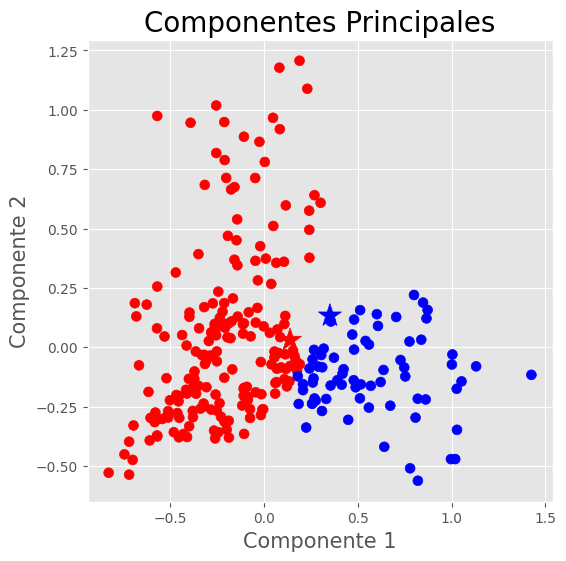

In [20]:
C = kmeans.cluster_centers_
fig = plt.figure(figsize = (6,6)) #Tamaño de la figura
ax = fig.add_subplot(1,1,1) #Crear un grafico dentro de la figura
ax.set_xlabel('Componente 1', fontsize = 15) #Nombre eje X y tamaño de fuente
ax.set_ylabel('Componente 2', fontsize = 15) #Nombre eje Y y tamaño de fuente
ax.set_title('Componentes Principales', fontsize = 20) #Nombre de Titulo y tamaño de fuente
colores=np.array(["Blue", "Red"]) #Arreglo de colores
ax.scatter(x = pca_Data_final.Componente1,  #Scatter es un tipo de grafico de distribución
           y = pca_Data_final.Componente2,
          c = colores[pca_Data_final.Cluster], s=50) #Se le asignan colores a los puntos 
 

plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=300)
plt.show()

In [30]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

pca_pipe = make_pipeline(MinMaxScaler(), PCA(n_components=2))
pca_pipe.fit(dataframefinal)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Se convierte el array a dataframe para añadir nombres a los ejes.
dataframefinal.drop(['Cluster'], axis=1)
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = dataframefinal.columns,
    index   = ['PC1', 'PC2']
)

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5,Cluster
PC1,0.179287,0.091096,0.164526,0.281201,0.191313,0.192441,0.238042,-0.103175,-0.097821,0.010352,-0.137996,-0.169325,-0.167402,-0.184522,0.186055,0.200313,-0.719908
PC2,-0.088790,0.000119,-0.038936,-0.150489,-0.099588,-0.096023,-0.062333,0.466436,0.448067,-0.026132,-0.294168,-0.343137,-0.348127,-0.323677,0.200842,0.203065,0.118789


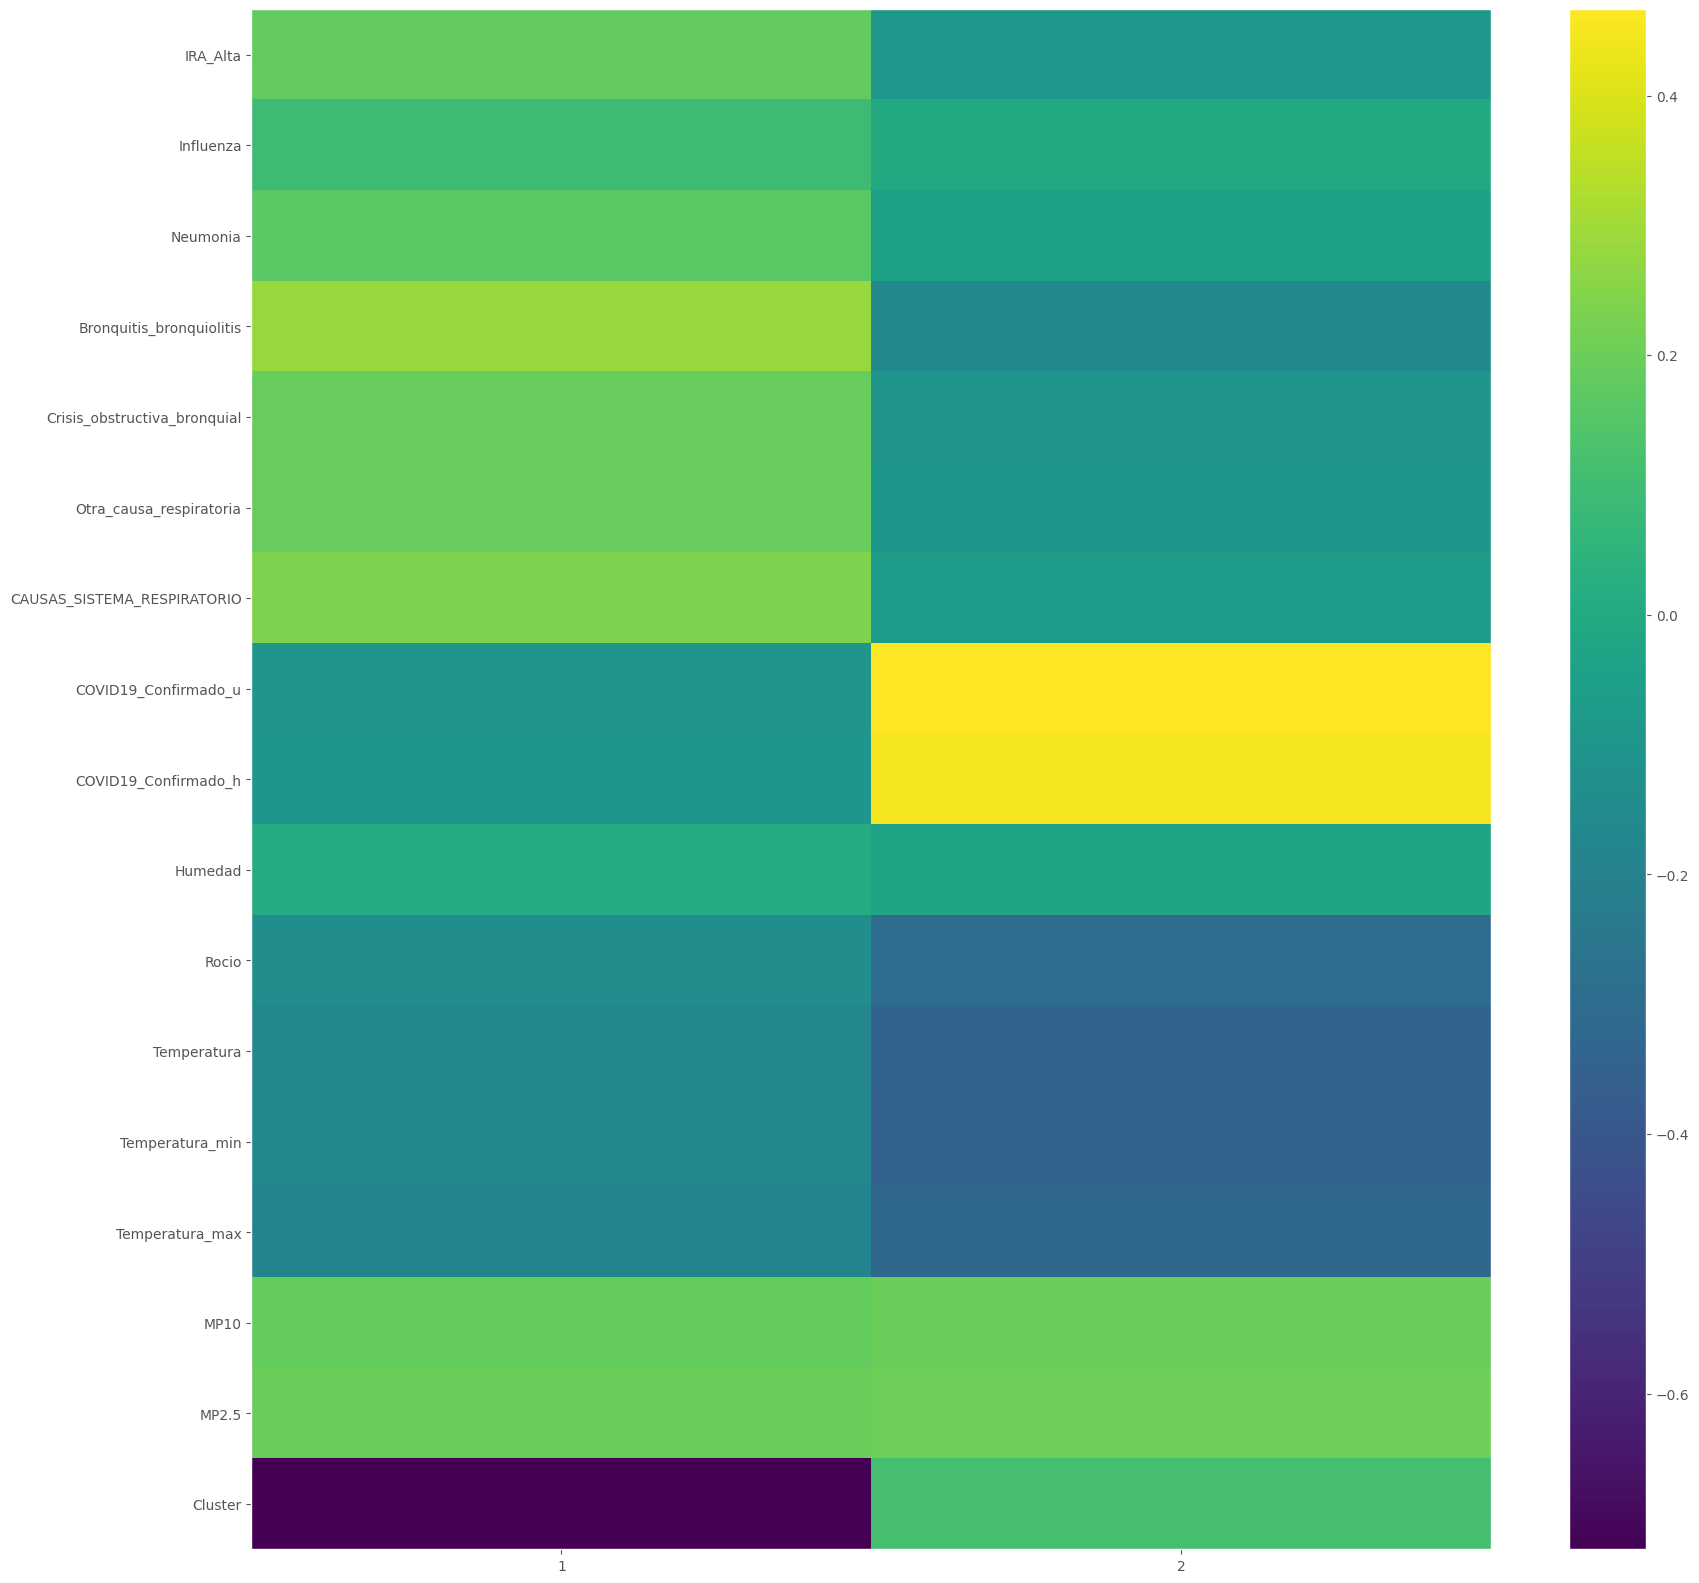

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
plt.xticks(range(2), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[3.98902037e-01 2.08998778e-01 8.69282308e-02 8.08942639e-02
 5.61815187e-02 5.27694432e-02 3.74501583e-02 2.37100662e-02
 1.45262747e-02 1.26748901e-02 1.04800640e-02 7.58000007e-03
 5.64303789e-03 1.64783942e-03 1.37742122e-03 2.35976897e-04]


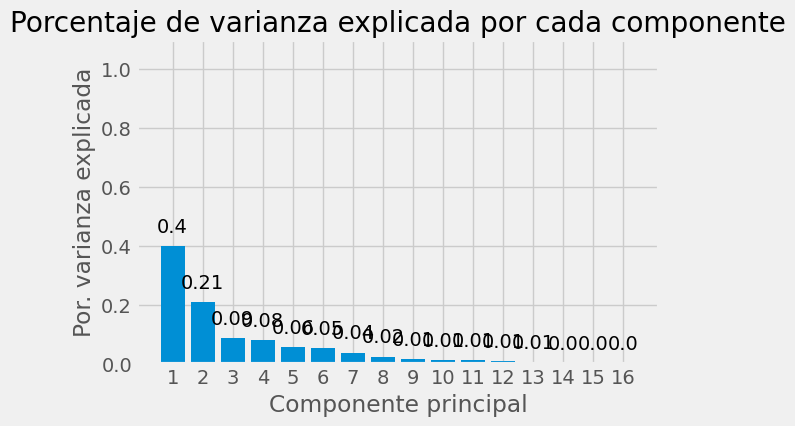

In [26]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)
for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');
plt.show()

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.36398908 0.59611723 0.67974793 0.75549364 0.8080788  0.85544734
 0.89336661 0.92339331 0.94368842 0.95683032 0.96830143 0.97821525
 0.98605251 0.99217265 0.99716109 0.99860906 0.99979305 1.        ]


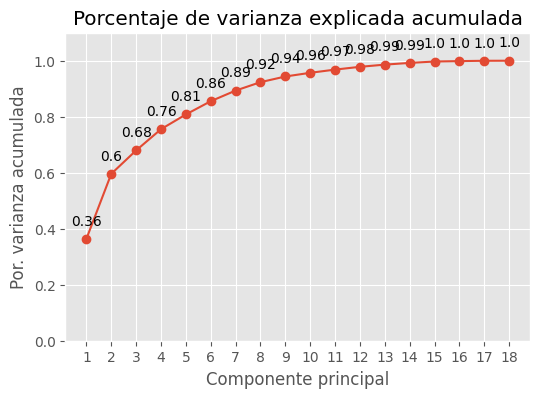

In [6]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(dataframefinal.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');
plt.show()

In [43]:
print(dataframefinal.index)
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=dataframefinal)
proyecciones = pd.DataFrame(
    proyecciones,
    columns =  ['PC1', 'PC2'],
    index   = dataframefinal.index
)
proyecciones.head()

proyecciones = np.dot(modelo_pca.components_, scale(dataframefinal).T) # (dataframefinal).T
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2'])
proyecciones = proyecciones.transpose().set_index(dataframefinal.index)
proyecciones.head()

print(proyecciones.head())

RangeIndex(start=0, stop=258, step=1)
        PC1       PC2
0 -0.489422 -0.988668
1 -1.209341 -1.508619
2 -2.839412 -3.537357
3 -3.335497 -4.043572
4 -1.925427 -2.549022
